# Visualization

In [1]:
from joblib import load

bs_dt_college = load('../../data/BSmodels/DecisionTree/bayes_search_college_model.joblib')
bs_dt_credit = load('../../data/BSmodels/DecisionTree/bayes_search_credit_model.joblib')
bs_dt_diabetes = load('../../data/BSmodels/DecisionTree/bayes_search_diabetes_model.joblib')
bs_dt_penguins = load('../../data/BSmodels/DecisionTree/bayes_search_penguins_model.joblib')

bs_kn_college = load('../../data/BSmodels/KNeighbors/bayes_search_college_model.joblib')
bs_kn_credit = load('../../data/BSmodels/KNeighbors/bayes_search_credit_model.joblib')
bs_kn_diabetes = load('../../data/BSmodels/KNeighbors/bayes_search_diabetes_model.joblib')
bs_kn_penguins = load('../../data/BSmodels/KNeighbors/bayes_search_penguins_model.joblib')

bs_xg_college = load('../../data/BSmodels/XGBoost/bayes_search_college_model.joblib')
bs_xg_credit = load('../../data/BSmodels/XGBoost/bayes_search_credit_model.joblib')
bs_xg_diabetes = load('../../data/BSmodels/XGBoost/bayes_search_diabetes_model.joblib')
bs_xg_penguins = load('../../data/BSmodels/XGBoost/bayes_search_penguins_model.joblib')

models = [bs_dt_college, bs_dt_credit, bs_dt_diabetes, bs_dt_penguins, bs_kn_college, bs_kn_credit, bs_kn_diabetes, bs_kn_penguins, bs_xg_college, bs_xg_credit, bs_xg_diabetes, bs_xg_penguins]
models



[BayesSearchCV(cv=5,
               estimator=Pipeline(steps=[('preprocessing',
                                          ColumnTransformer(transformers=[('num_pipeline',
                                                                           Pipeline(steps=[('num_impute',
                                                                                            SimpleImputer()),
                                                                                           ('scale',
                                                                                            MinMaxScaler())]),
                                                                           <sklearn.compose._column_transformer.make_column_selector object at 0x000002840F1832D0>),
                                                                          ('cat_pipeline',
                                                                           Pipeline(steps=[('cat_impute',
                                       

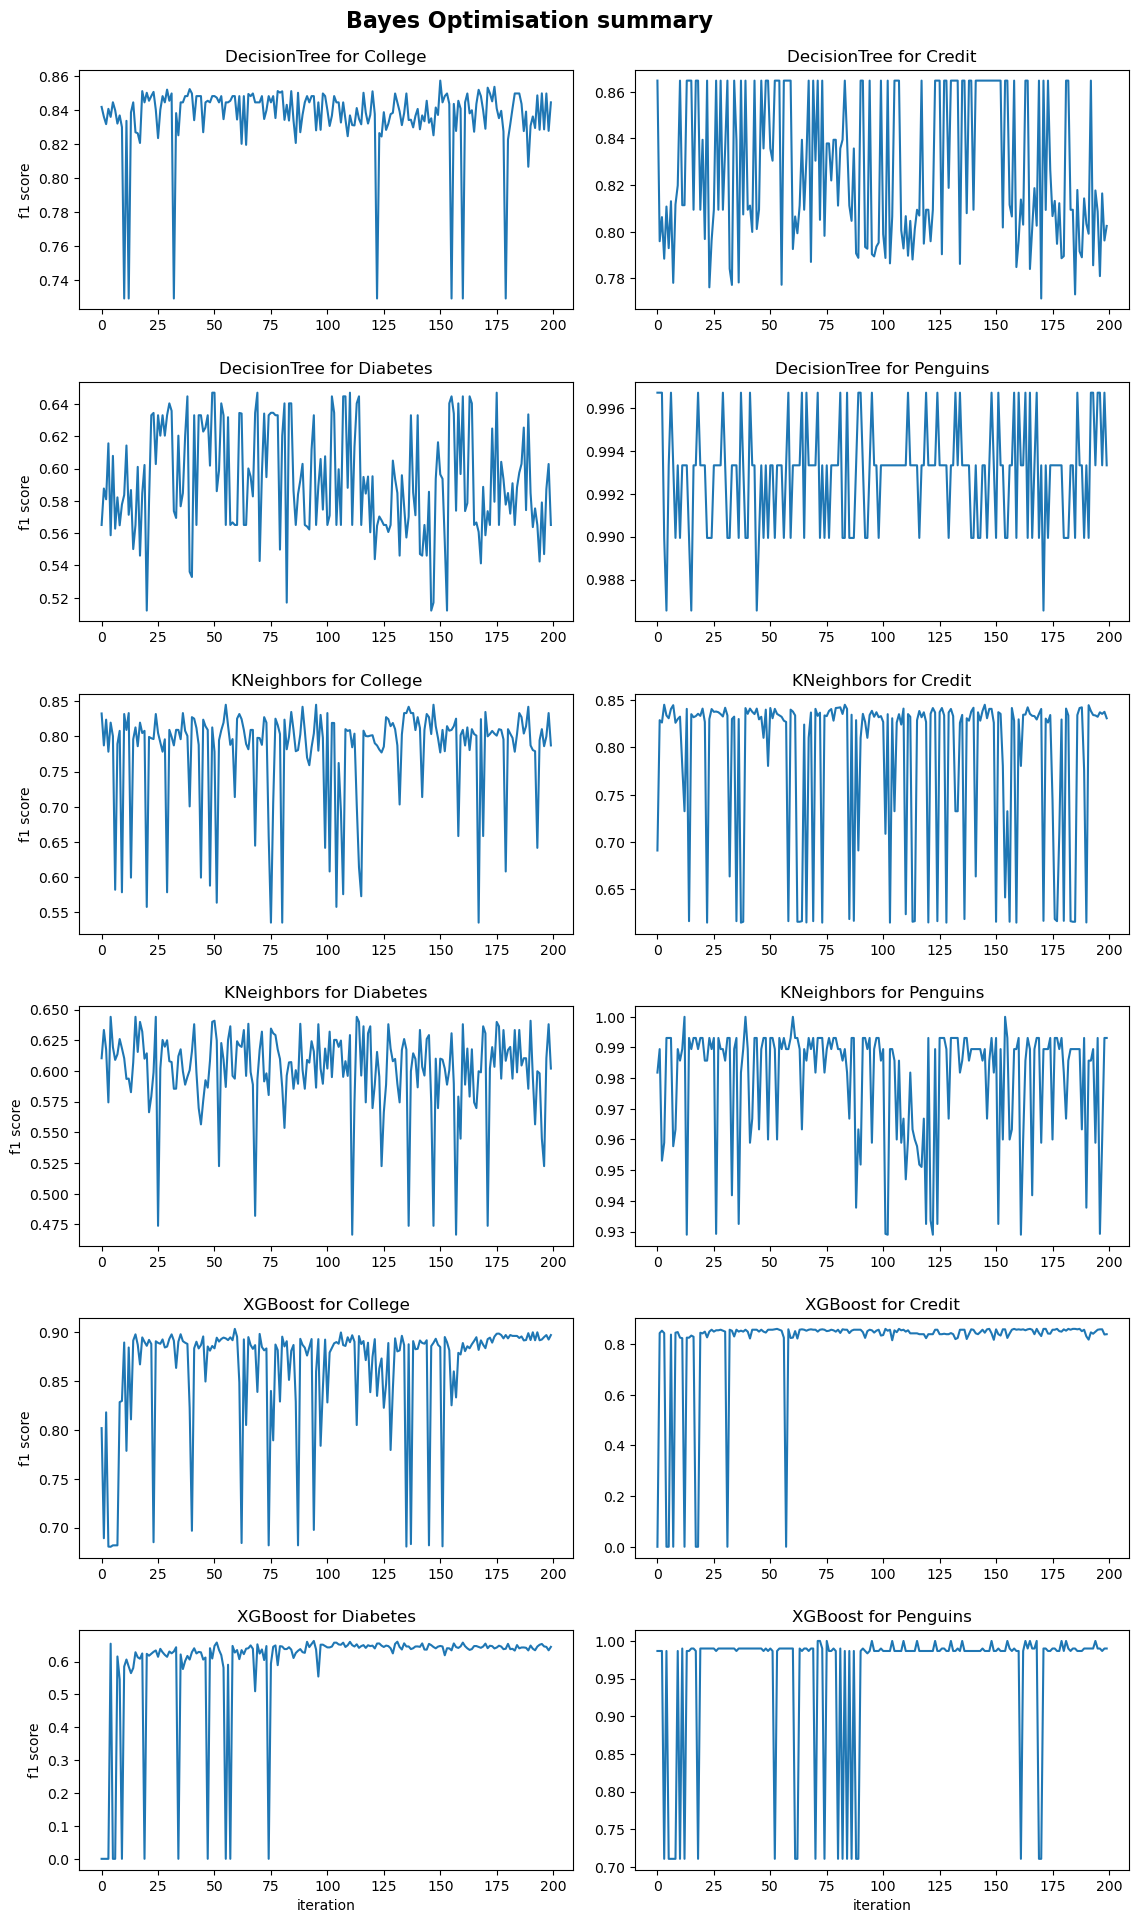

In [ ]:
import matplotlib.pyplot as plt

model_names = ["DecisionTree", "KNeighbors", "XGBoost"]
dataset_names = ["College", "Credit", "Diabetes", "Penguins"]

num_models = len(models)

fig, axs = plt.subplots(6, 2, figsize=(15, 20))

axs = axs.ravel()

for row, model_name in enumerate(model_names):
    for col, dataset_name in enumerate(dataset_names):
        i = row * 4 + col  
        axs[i].plot(models[i].cv_results_['mean_test_score'])  
        axs[i].set_title(f"{model_name} for {dataset_name}")
        
        
        if i >= 10:
            axs[i].set_xlabel("iteration")
        
        if i % 2 == 0:
            axs[i].set_ylabel("f1 score")

fig.suptitle("Bayes Optimisation summary", fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

fig.subplots_adjust(left=0.2, right=0.9, top=0.95, bottom=0.05)
plt.show()

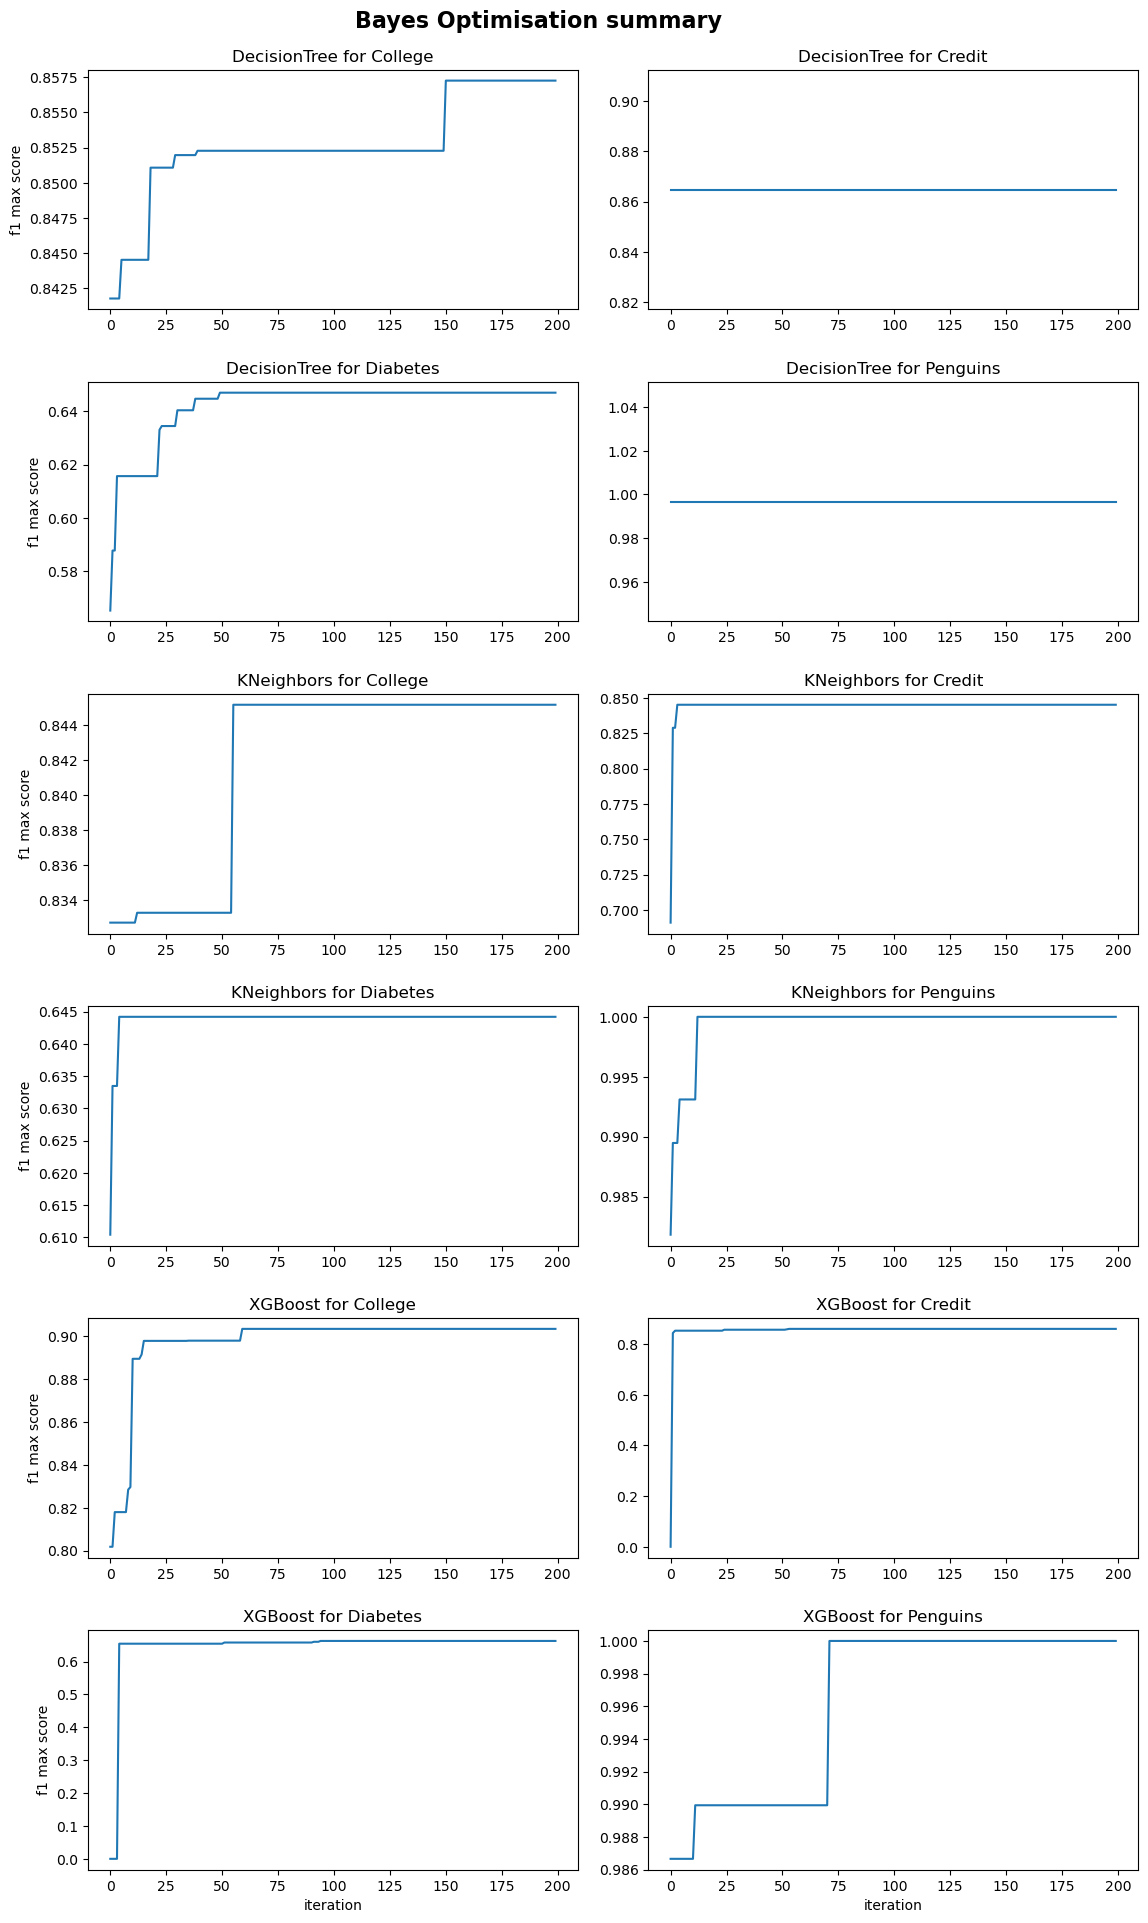

In [43]:
import numpy as np

fig, axs = plt.subplots(6, 2, figsize=(15, 20))
axs = axs.ravel()  

for row, model_name in enumerate(model_names):
    for col, dataset_name in enumerate(dataset_names):
        i = row * 4 + col  

        mean_test_score = models[i].cv_results_['mean_test_score']

        max_scores = np.maximum.accumulate(mean_test_score)

        axs[i].plot(np.arange(len(mean_test_score)), max_scores)

        axs[i].set_title(f"{model_name} for {dataset_name}")

        if i >= 10:
            axs[i].set_xlabel("iteration")
        
        if i % 2 == 0:
            axs[i].set_ylabel("f1 max score")

fig.suptitle("Bayes Optimisation summary", fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

fig.subplots_adjust(left=0.2, right=0.9, top=0.95, bottom=0.05)
plt.show()